In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns

In [2]:
df = pd.read_csv('data_science_job.csv')

In [3]:
df.columns

Index(['enrollee_id', 'city', 'city_development_index', 'gender',
       'relevent_experience', 'enrolled_university', 'education_level',
       'major_discipline', 'experience', 'company_size', 'company_type',
       'training_hours', 'target'],
      dtype='object')

In [123]:
newdf = df[['city_development_index','gender','major_discipline','education_level','experience','target']]

In [5]:
df.isnull().sum().sum()

21555

In [6]:
(df.size /df.isnull().sum().sum() )

11.554349338900487

In [7]:
df.dropna(inplace = True)

In [8]:
df.head()

,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,training_hours,target
1,29725,city_40,0.776,Male,No relevent experience,no_enrollment,Graduate,STEM,15.0,50-99,Pvt Ltd,47.0,0.0
4,666,city_162,0.767,Male,Has relevent experience,no_enrollment,Masters,STEM,20.0,50-99,Funded Startup,8.0,0.0
7,402,city_46,0.762,Male,Has relevent experience,no_enrollment,Graduate,STEM,13.0,<10,Pvt Ltd,18.0,1.0
8,27107,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,7.0,50-99,Pvt Ltd,46.0,1.0
11,23853,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,5.0,5000-9999,Pvt Ltd,108.0,0.0


In [127]:
newdf.head()

,city_development_index,gender,major_discipline,education_level,experience,target
1,0.776,Male,STEM,Graduate,15.0,0.0
4,0.767,Male,STEM,Masters,20.0,0.0
7,0.762,Male,STEM,Graduate,13.0,1.0
8,0.920,Male,STEM,Graduate,7.0,1.0
11,0.920,Male,STEM,Graduate,5.0,0.0


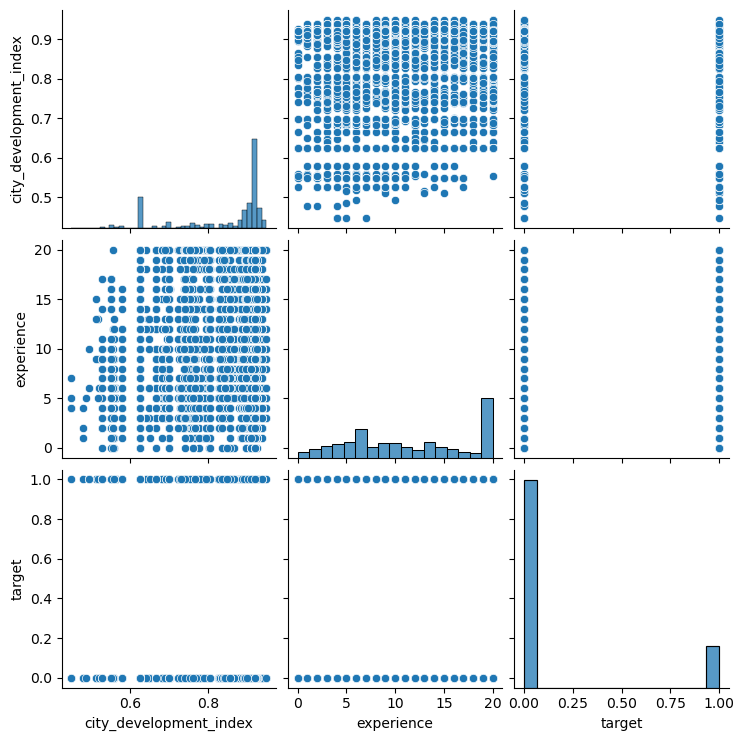

In [129]:
sns.pairplot(data = newdf)

In [11]:
newdf['experience'].unique()

array([20., 15.,  5.,  0., 11., 13.,  7., 17.,  2., 16.,  1.,  4., 10.,
       14., 18., 19., 12.,  3.,  6.,  9.,  8., nan])

In [12]:
from sklearn.preprocessing import LabelEncoder

In [131]:
obj1 = LabelEncoder()
obj2 = LabelEncoder()
obj3 = LabelEncoder()

In [135]:
obj1.fit(newdf['gender'])
obj2.fit(newdf['major_discipline'])
obj3.fit(newdf['education_level'])

LabelEncoder()

In [137]:
newdf['gender'] = obj1.transform(newdf['gender'])
newdf['major_discipline'] = obj2.transform(newdf['major_discipline'])
newdf['education_level'] = obj3.transform(newdf['education_level'])

C:\Users\siddh\AppData\Local\Temp\ipykernel_524\3267237360.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  newdf['gender'] = obj1.transform(newdf['gender'])
C:\Users\siddh\AppData\Local\Temp\ipykernel_524\3267237360.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  newdf['major_discipline'] = obj2.transform(newdf['major_discipline'])
C:\Users\siddh\AppData\Local\Temp\ipykernel_524\3267237360.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .lo

In [139]:
newdf.dropna(inplace = True)

C:\Users\siddh\AppData\Local\Temp\ipykernel_524\3553863005.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  newdf.dropna(inplace = True)


In [141]:
x = newdf.iloc[:,:-1]

In [143]:
y = newdf['target']

In [145]:
from sklearn.model_selection import train_test_split

In [154]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=42)

In [164]:
from sklearn.linear_model import LogisticRegression

In [166]:
obj = LogisticRegression()

In [168]:
obj.fit(x_train,y_train)

LogisticRegression()

In [170]:
obj.score(x_test,y_test) * 100

83.87670420865442

In [172]:
newdf.head()

,city_development_index,gender,major_discipline,education_level,experience,target
1,0.776,1,5,0,15.0,0.0
4,0.767,1,5,1,20.0,0.0
7,0.762,1,5,0,13.0,1.0
8,0.920,1,5,0,7.0,1.0
11,0.920,1,5,0,5.0,0.0


In [178]:
obj.predict([[0.920	,1	,5	,0,	7.0]])

C:\Users\siddh\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


array([0.])

In [180]:
import imblearn

In [200]:
from imblearn.over_sampling import RandomOverSampler

In [202]:
rm = RandomOverSampler()

In [204]:
rm_x,rm_y = rm.fit_resample(x,y)

In [206]:
rm_y.value_counts()

target
0.0    7040
1.0    7040
Name: count, dtype: int64

In [208]:
x_train,x_test,y_train,y_test = train_test_split(rm_x,rm_y,test_size=0.2,random_state=42)

In [210]:
obj.fit(x_train,y_train)

LogisticRegression()

In [212]:
obj.score(x_test,y_test)

0.7102272727272727

In [214]:
obj.predict([[0.920	,1	,5	,0,	7.0]])

C:\Users\siddh\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


array([0.])

In [218]:
from sklearn.metrics import confusion_matrix

In [220]:
cf = confusion_matrix(y_test,obj.predict(x_test))

<Axes: >

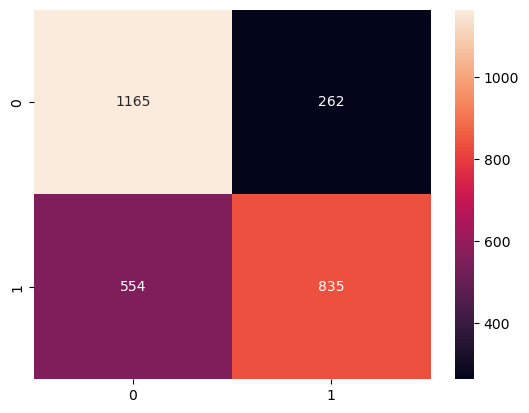

In [226]:
sns.heatmap(data = cf,annot=True,fmt='d')

In [229]:
data = pd.read_csv('india_housing_prices.csv')

In [235]:
data.tail()

,ID,State,City,Locality,Property_Type,BHK,Size_in_SqFt,Price_in_Lakhs,Price_per_SqFt,Year_Built,...,Age_of_Property,Nearby_Schools,Nearby_Hospitals,Public_Transport_Accessibility,Parking_Space,Security,Amenities,Facing,Owner_Type,Availability_Status
249995,249996,Gujarat,Ahmedabad,Locality_187,Independent House,5,1995,274.75,0.14,1995,...,30,8,6,Low,No,No,"Playground, Garden, Gym, Clubhouse, Pool",East,Broker,Under_Construction
249996,249997,Tamil Nadu,Chennai,Locality_348,Apartment,1,2293,13.40,0.01,2013,...,12,8,10,Low,No,No,Playground,South,Broker,Ready_to_Move
249997,249998,Telangana,Warangal,Locality_225,Villa,4,2910,236.94,0.08,2003,...,22,10,4,High,Yes,Yes,Playground,South,Builder,Under_Construction
249998,249999,Odisha,Cuttack,Locality_138,Villa,1,1149,141.66,0.12,2007,...,18,3,7,Low,Yes,Yes,"Playground, Gym, Pool",South,Owner,Ready_to_Move
249999,250000,Haryana,Gurgaon,Locality_268,Independent House,3,4313,199.69,0.05,1990,...,35,10,6,Medium,No,No,"Gym, Garden",South,Owner,Under_Construction


In [237]:
data.columns

Index(['ID', 'State', 'City', 'Locality', 'Property_Type', 'BHK',
       'Size_in_SqFt', 'Price_in_Lakhs', 'Price_per_SqFt', 'Year_Built',
       'Furnished_Status', 'Floor_No', 'Total_Floors', 'Age_of_Property',
       'Nearby_Schools', 'Nearby_Hospitals', 'Public_Transport_Accessibility',
       'Parking_Space', 'Security', 'Amenities', 'Facing', 'Owner_Type',
       'Availability_Status'],
      dtype='object')

In [245]:
newdata = data[['State','City','Property_Type','BHK','Size_in_SqFt','Price_in_Lakhs']]

In [247]:
newdata.head()

,State,City,Property_Type,BHK,Size_in_SqFt,Price_in_Lakhs
0,Tamil Nadu,Chennai,Apartment,1,4740,489.76
1,Maharashtra,Pune,Independent House,3,2364,195.52
2,Punjab,Ludhiana,Apartment,2,3642,183.79
3,Rajasthan,Jodhpur,Independent House,2,2741,300.29
4,Rajasthan,Jaipur,Villa,4,4823,182.90


In [249]:
newdata['Property_Type'].unique()

array(['Apartment', 'Independent House', 'Villa'], dtype=object)

<Axes: xlabel='Size_in_SqFt', ylabel='BHK'>

C:\Users\siddh\anaconda3\Lib\site-packages\IPython\core\events.py:82: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  func(*args, **kwargs)
C:\Users\siddh\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


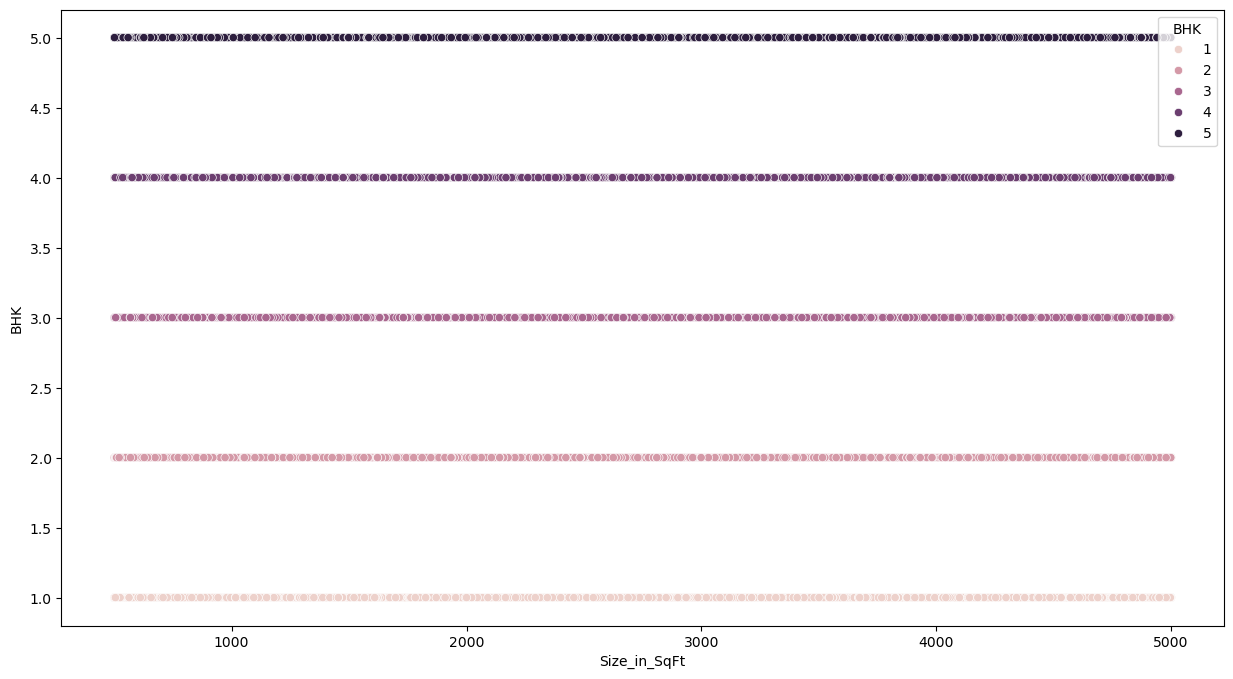

In [266]:
plt.figure(figsize = (15,8))
sns.scatterplot(x = 'Size_in_SqFt', y = 'BHK',data = newdata, hue = 'BHK')

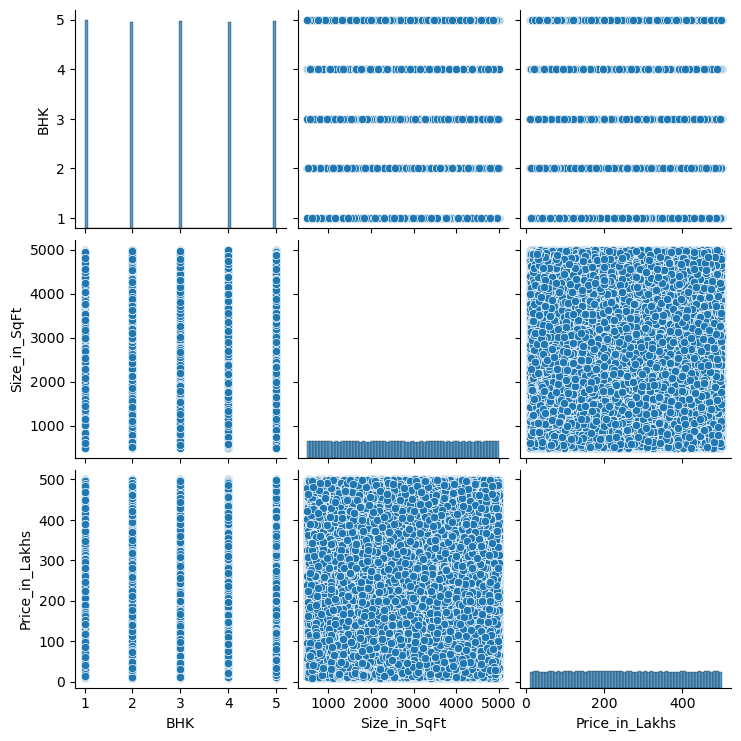

In [268]:
sns.pairplot(data = newdata)